### ***Import Libraries***

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### ***Loading of Dataset***

In [2]:
# Import Dataset
data = pd.read_csv("data.csv")
data.head()

Unnamed: 0                         Brand me  Ratings  RAM    ROM  \
0           0            LG V30+ (Black, 128 )      4.3  4.0  128.0   
1           1                       I Kall K11      3.4  6.0   64.0   
2           2                     Nokia 105 ss      4.3  4.0    4.0   
3           3  Samsung Galaxy A50 (White, 64 )      4.4  6.0   64.0   
4           4       POCO F1 (Steel Blue, 128 )      4.5  6.0  128.0   

   Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Price  
0         6.00           48       13.0           4000  24999  
1         4.50           48       12.0           4000  15999  
2         4.50           64       16.0           4000  15000  
3         6.40           48       15.0           3800  18999  
4         6.18           35       15.0           3800  18999

In [3]:
# Drop the Unwannted column the first one
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
# Checking null values into the dataset
data.isna().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

### ***Data Preprocessing***

***Preprocessing of Missing Value***

<AxesSubplot:>

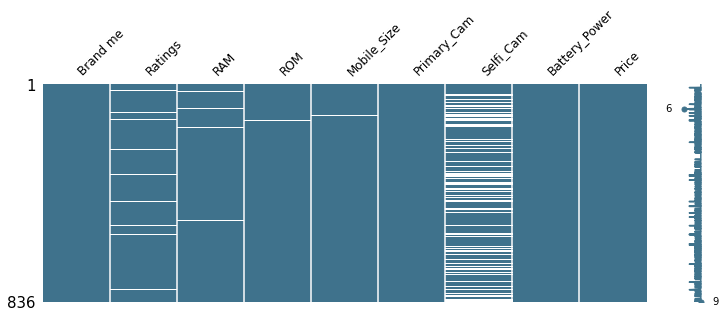

In [5]:
msno.matrix(data, figsize=(12,4), fontsize=12, color=(0.25, 0.45, 0.55))

The above matrix plot shows that Selfi_Cam column got more number of missing value compare to other.

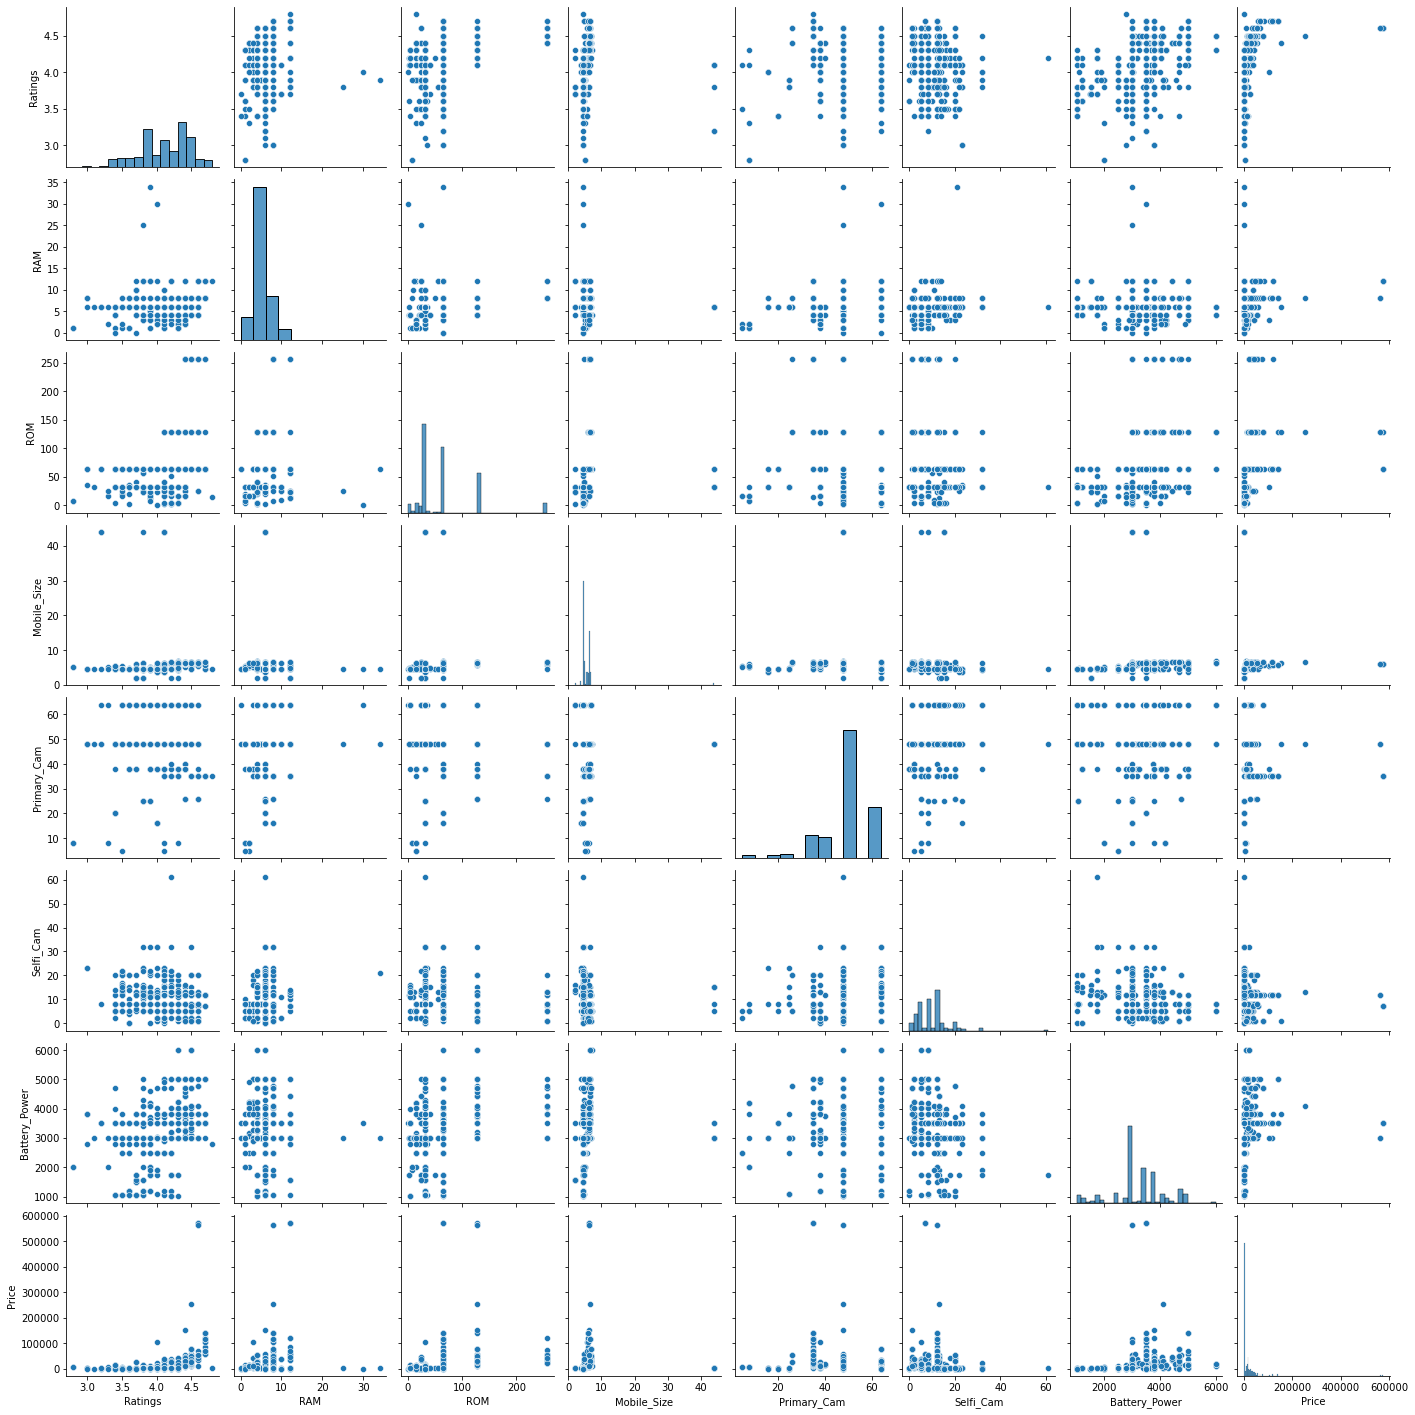

In [6]:
sns.pairplot(data)

The above pairplot shows the general relationship between the attributes

In [7]:
# Correlation Matrix
data.corr()

Ratings       RAM       ROM  Mobile_Size  Primary_Cam  \
Ratings        1.000000  0.101002  0.458957     0.089091    -0.098439   
RAM            0.101002  1.000000  0.252041    -0.001280     0.141025   
ROM            0.458957  0.252041  1.000000     0.108141    -0.070019   
Mobile_Size    0.089091 -0.001280  0.108141     1.000000    -0.059971   
Primary_Cam   -0.098439  0.141025 -0.070019    -0.059971     1.000000   
Selfi_Cam     -0.176199  0.211169 -0.116891    -0.062876     0.196474   
Battery_Power  0.478596  0.023227  0.410130     0.131636    -0.057011   
Price          0.367021  0.236988  0.255682     0.049087    -0.158122   

               Selfi_Cam  Battery_Power     Price  
Ratings        -0.176199       0.478596  0.367021  
RAM             0.211169       0.023227  0.236988  
ROM            -0.116891       0.410130  0.255682  
Mobile_Size    -0.062876       0.131636  0.049087  
Primary_Cam     0.196474      -0.057011 -0.158122  
Selfi_Cam       1.000000      -0.219606 -0.047000  
Battery_Power  -0.219606       1.000000  0.168626  
Price          -0.047000       0.168626  1.000000

In [8]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        805 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      567 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [9]:
# data.dtypes

data.describe()

Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  805.000000  829.000000  832.000000   834.000000   836.000000   
mean     4.103106    6.066345   64.373077     5.597282    47.983254   
std      0.365356    2.530336   53.447825     3.898664    11.170093   
min      2.800000    0.000000    0.000000     2.000000     5.000000   
25%      3.800000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   40.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   34.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power         Price  
count  567.000000     836.000000     836.00000  
mean     9.784832    3274.688995   18220.34689  
std      6.503838     927.518852   52805.55022  
min      0.000000    1020.000000     479.00000  
25%      5.000000    3000.000000     984.75000  
50%      8.000000    3000.000000    1697.00000  
75%     13.000000    3800.000000   18999.00000  
max     61.000000    6000.000000  573000.00000

In [10]:
data.shape

(836, 9)

***Droping Missing Value*** 

In [11]:
# col = titan.dropna(axis = 1) # This dropna() function will drop specific missing column or row.  
# col

# row = d1.dropna(axis = 0)  # axis = 1 for column and axis = 0 for row.
# row

Above code is for dropping the missing values. But we will not use because we are going to replace the missing value with mean.

In [12]:
# SimpleImputer handles missing values

col = ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Selfi_Cam']

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

imputer = imputer.fit(data[col])

data[col] = imputer.transform(data[col])

In [13]:
data

Brand me  Ratings   RAM    ROM  Mobile_Size  \
0              LG V30+ (Black, 128 )      4.3   4.0  128.0         6.00   
1                         I Kall K11      3.4   6.0   64.0         4.50   
2                       Nokia 105 ss      4.3   4.0    4.0         4.50   
3    Samsung Galaxy A50 (White, 64 )      4.4   6.0   64.0         6.40   
4         POCO F1 (Steel Blue, 128 )      4.5   6.0  128.0         6.18   
..                               ...      ...   ...    ...          ...   
831             Karbonn K24 Plus Pro      3.8   6.0   32.0         4.54   
832                  InFocus POWER 2      4.1   8.0   64.0         4.54   
833  Alcatel 5V (Spectrum Blue, 32 )      4.4   3.0   32.0         6.20   
834                      JIVI JV 12M      3.7  10.0   32.0         4.50   
835                  Blacear B5 Grip      3.5   6.0   32.0         4.50   

     Primary_Cam  Selfi_Cam  Battery_Power  Price  
0             48  13.000000           4000  24999  
1             48  12.000000           4000  15999  
2             64  16.000000           4000  15000  
3             48  15.000000           3800  18999  
4             35  15.000000           3800  18999  
..           ...        ...            ...    ...  
831           48  12.000000           2800   1299  
832           64   9.784832           2500   1390  
833           48   1.000000           3800   9790  
834           64   9.784832           3500    799  
835           64  15.000000           1050    799  

[836 rows x 9 columns]

In [14]:
data.isna().sum()

Brand me         0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Now, we have cleaned the missing data using mean values without dropping its row.

In [15]:
# Changing the column name

data.rename(columns = {'Brand me':'Brand'}, inplace = True)

data

Brand  Ratings   RAM    ROM  Mobile_Size  \
0              LG V30+ (Black, 128 )      4.3   4.0  128.0         6.00   
1                         I Kall K11      3.4   6.0   64.0         4.50   
2                       Nokia 105 ss      4.3   4.0    4.0         4.50   
3    Samsung Galaxy A50 (White, 64 )      4.4   6.0   64.0         6.40   
4         POCO F1 (Steel Blue, 128 )      4.5   6.0  128.0         6.18   
..                               ...      ...   ...    ...          ...   
831             Karbonn K24 Plus Pro      3.8   6.0   32.0         4.54   
832                  InFocus POWER 2      4.1   8.0   64.0         4.54   
833  Alcatel 5V (Spectrum Blue, 32 )      4.4   3.0   32.0         6.20   
834                      JIVI JV 12M      3.7  10.0   32.0         4.50   
835                  Blacear B5 Grip      3.5   6.0   32.0         4.50   

     Primary_Cam  Selfi_Cam  Battery_Power  Price  
0             48  13.000000           4000  24999  
1             48  12.000000           4000  15999  
2             64  16.000000           4000  15000  
3             48  15.000000           3800  18999  
4             35  15.000000           3800  18999  
..           ...        ...            ...    ...  
831           48  12.000000           2800   1299  
832           64   9.784832           2500   1390  
833           48   1.000000           3800   9790  
834           64   9.784832           3500    799  
835           64  15.000000           1050    799  

[836 rows x 9 columns]

In [16]:
# To download the cleaned dataset

data.to_csv("Cleaned_data.csv")

In [17]:
# Instantiate LabelEncoder, to change brand name into integer datatype

le = LabelEncoder()

data['Brand'] = le.fit_transform(data['Brand'])

data

Brand  Ratings   RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  \
0      184      4.3   4.0  128.0         6.00           48  13.000000   
1       82      3.4   6.0   64.0         4.50           48  12.000000   
2      250      4.3   4.0    4.0         4.50           64  16.000000   
3      349      4.4   6.0   64.0         6.40           48  15.000000   
4      303      4.5   6.0  128.0         6.18           35  15.000000   
..     ...      ...   ...    ...          ...          ...        ...   
831    153      3.8   6.0   32.0         4.54           48  12.000000   
832    117      4.1   8.0   64.0         4.54           64   9.784832   
833      3      4.4   3.0   32.0         6.20           48   1.000000   
834    139      3.7  10.0   32.0         4.50           64   9.784832   
835     27      3.5   6.0   32.0         4.50           64  15.000000   

     Battery_Power  Price  
0             4000  24999  
1             4000  15999  
2             4000  15000  
3             3800  18999  
4             3800  18999  
..             ...    ...  
831           2800   1299  
832           2500   1390  
833           3800   9790  
834           3500    799  
835           1050    799  

[836 rows x 9 columns]

In [18]:
pd.unique(data['Brand'])

array([184,  82, 250, 349, 303,   9, 352, 367, 272, 301, 213, 147, 420,
        44, 296, 295, 167, 370, 366, 269, 117,  31, 156, 234, 383,  32,
       154, 198,  89, 118, 180,  53, 389, 191,  22, 235, 136, 149, 161,
       124, 181, 284, 231, 214, 145, 258, 185,  41,  10, 374,  34, 153,
       120,  27,   8, 139,   3, 168, 330, 343, 323,  17,   5,  55,  54,
        42, 138, 152, 246, 278,   6,  40, 162, 182, 281, 334, 253, 172,
       137, 287, 144, 122,  45,  56, 248, 143, 240, 375, 376, 388, 378,
       307, 386, 329, 265, 270, 266, 415, 237, 406, 409,  97, 325,  50,
        52, 371, 160, 321, 219,  24, 179, 256, 140,  37, 232, 196, 244,
       223,  93, 267, 228,  79, 417, 157, 203, 148,  62, 379,  11, 282,
       283, 341, 377, 336, 207,  84, 164, 209, 331, 347, 259, 211, 200,
       205, 107, 132, 155, 210,  99,  70, 150,  51, 396, 151,  88,  98,
       238, 392,  74, 195, 356, 123,   2, 217, 220, 373, 119, 312,  71,
        80, 188, 129,  38, 302, 103, 421, 116, 402,  92, 133, 11

In [19]:
# Checking for existing of missing value

data.isna().sum()

Brand            0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [20]:
data.dtypes

Brand              int32
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

### ***Algorithm and Data Visualization Part***

***1. Barplot for RAM vs Price***

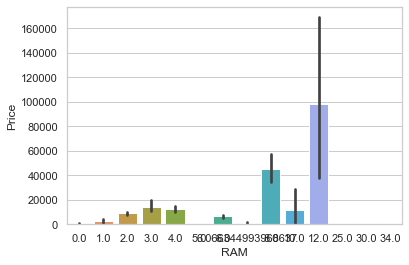

In [21]:
sns.set_theme(style="whitegrid")
sns.barplot(x="RAM", y="Price", data=data)
sns.set({'figure.figsize':(15,8)})

***2. Barplot for ROM vs Price***

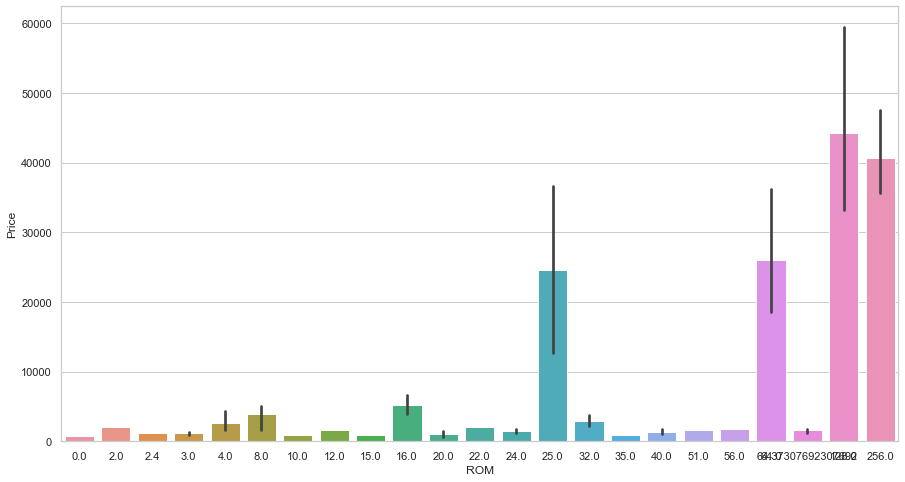

In [22]:
sns.set_theme(style="whitegrid")
sns.barplot(x="ROM", y="Price", data=data)
sns.set({'figure.figsize':(15,8)})

From above two plot, we could see that the price for the mobile increases as the RAM and ROM storage increases.

***Model Fitting***

In [23]:
# Value Assigning
x = data[ ['Brand', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power'] ]
y = data['Price']

In [24]:
# training and testing 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

print("shape of training set", x_train.shape)

print("shape of testing set", x_test.shape)

shape of training set (627, 8)
shape of testing set (209, 8)


 ***1. KNN Regression***

Text(0.5, 0, 'RAM and ROM ')

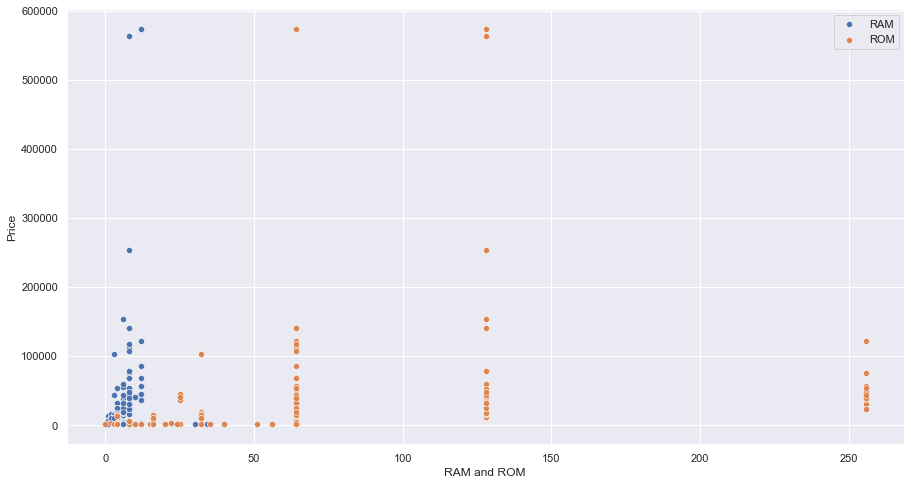

In [25]:
# visualize the data using scatter plot  

sns.scatterplot(data=data, x=data['RAM'], y=data['Price'], label='RAM')

sns.scatterplot(data=data, x=data['ROM'], y=data['Price'], label='ROM')

plt.xlabel("RAM and ROM ")

***Building a Model***

In [26]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [27]:
# Predict using the test set 

y_pred = knn.predict(x_test)

y_pred

array([ 35990.        ,   1697.66666667,  26996.        ,   1591.        ,
          965.66666667,    861.        ,  18999.        ,    898.        ,
          765.66666667,   1697.66666667,    963.33333333,  18659.66666667,
        14659.66666667,  14033.        ,    946.        ,  29656.66666667,
          815.66666667,    765.66666667,   1591.        ,    945.66666667,
          948.33333333,  15332.33333333,    682.33333333,  66993.33333333,
        17993.        ,   3073.        ,   2449.66666667,   1382.33333333,
         1011.33333333,  39999.        ,  29656.66666667,   1167.33333333,
         1215.33333333,  16599.66666667,   1092.66666667,   1011.33333333,
         8462.66666667,    849.        ,   8462.66666667,  24999.        ,
          795.66666667,    865.66666667,   1062.33333333,  16323.33333333,
         1232.33333333,  82533.        ,    649.        ,   1167.33333333,
        21292.66666667,   7432.33333333,    849.        ,  16599.66666667,
         1826.33333333,  

In [28]:
# Displaying actual and predicted values
pd.DataFrame( {'Actual Prize':y_test,
               'Predicted Prize':y_pred} 
            ) 


Actual Prize  Predicted Prize
611         37990     35990.000000
823          1695      1697.666667
290         18999     26996.000000
801          1599      1591.000000
168         15999       965.666667
..            ...              ...
589          8995      9505.000000
213          9998     17832.333333
311           649       715.666667
752         24999      5665.666667
90           1049      1015.666667

[209 rows x 2 columns]

In [29]:
# User-supplied input. 

brand = float(input("Enter the value of Brand: "))
rating = float(input("Enter Rating: "))
ram = float(input("Enter the capacity of RAM: "))
rom = float(input("Enter the capacity of ROM: "))
msize = float(input("Enter the size of the Mobile: "))
pcam = float(input("Enter the Primary Cam: "))
scam = float(input("Enter the Selfie Cam: "))
bpower = float(input("Enter Battery Power: "))

df = [brand, rating, ram, rom, msize, pcam, scam, bpower]
data = pd.DataFrame([df], columns =['Brand', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power'])

print ("KNN Predicted Price to be: ", knn.predict(data) ) 

Enter the value of Brand: 82
Enter Rating: 3.4
Enter the capacity of RAM: 6
Enter the capacity of ROM: 64
Enter the size of the Mobile: 4.50
Enter the Primary Cam: 48
Enter the Selfie Cam: 12
Enter Battery Power: 4000
KNN Predicted Price to be:  [20832.33333333]


In [30]:
# Training accuracy
print("Training Accuracy:", knn.score(x_train, y_train)*100)

# Testing Accuracy
print("Testing Accuracy:", knn.score(x_test, y_test)*100)

Training Accuracy: 83.3020386424678
Testing Accuracy: 43.42474717743603


In [31]:
# R2 value 
print("Model Performance: ",  knn.score(x_test, y_test)*100)

#print ("MSE: ", mean_squared_error(y_test, y_pred))
print ("Root MSE: ", sqrt(mean_squared_error(y_test, y_pred)) )
#print ("MAE: ", mean_absolute_error(y_test, y_pred))


Model Performance:  43.42474717743603
Root MSE:  33090.485902831446


***2. Linear Regression***

In [32]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [33]:
print("Y intercept", linear.intercept_)

print("Slope/Cofficient", linear.coef_)

Y intercept -188310.78102236078
Slope/Cofficient [-8.41453308e+01  5.52506271e+04  4.13327074e+03  8.28418483e+01
  2.19561862e+02 -6.61354919e+02 -3.47288101e+02  4.03489457e-01]


In [34]:
y_pred1 = linear.predict(x_train)

# y_pred1

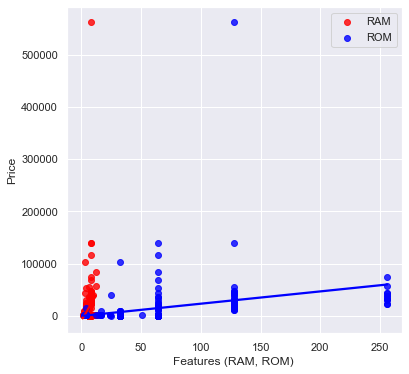

In [35]:
# plot multiple regression plots using seaborn's regplot()

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot(x=x_test['RAM'], y=y_test, ci=None, color ='red',  label='RAM')
sns.regplot(x=x_test['ROM'], y=y_test, ci=None, color ='blue', label='ROM')

plt.legend()

ax.set(ylabel='Price', xlabel='Features (RAM, ROM) ')
sns.set({'figure.figsize':(15,8)})

In [36]:
# Training Score
print("Training Accuracy:",linear.score(x_train, y_train)*100)

# Testing Score
print("Testing Accuracy:",linear.score(x_test, y_test)*100)

Training Accuracy: 23.18923453751577
Testing Accuracy: 15.085480602942635


***3. Decision Tree***

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [38]:
# Predict the response for test dataset

y_pred2 = clf.predict(x_test)

In [39]:
# Training accuracy
print("Training Accuracy:", clf.score(x_train, y_train)*100)

# Testing Accuracy
print("Testing Accuracy:", clf.score(x_test, y_test)*100)

Training Accuracy: 96.33173843700159
Testing Accuracy: 54.54545454545454


### ***Error***

In [40]:
# R2 value
print("Model Performance", clf.score(x_test, y_test))

print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("Root MSE", sqrt(mean_squared_error(y_test, y_pred)))

Model Performance 0.5454545454545454
MSE 1094980257.2854865
MAE 8824.755980861244
Root MSE 33090.485902831446
